In [5]:
from modules.training_and_fine_tuning.training.train_cnn_model_using_mel_spectrogram import CnnModelUsingMelSpectrogram
from keras.models import load_model
from config.eng_config import Config
import matplotlib.pyplot as plt
from modules.training_and_fine_tuning.utils.mel_spectrogram_image_data_utils import MelSpectrogramDataUtils
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [6]:
input_shape = (128,128,3)
num_classes = 7
n_mels = Config.n_mels

In [8]:
ser_model = CnnModelUsingMelSpectrogram((input_shape), num_classes)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
def get_n_mels_paths(n_mels, Config):
    train_path = Config.n_mels_config[n_mels].train_path
    validation_path = Config.n_mels_config[n_mels].validation_path
    test_path = Config.n_mels_config[n_mels].test_path
    return train_path, validation_path, test_path

In [10]:
def get_train_test_val_data(n_mels, Config):
    train_path, test_path, val_path = get_n_mels_paths(n_mels, Config)
    X_train, y_train = MelSpectrogramDataUtils.process_data(train_path)
    X_val, y_val = MelSpectrogramDataUtils.process_data(val_path)
    X_test, y_test = MelSpectrogramDataUtils.process_data(test_path)
    return X_train, y_train, X_val, y_val, X_test, y_test

# Chuẩn bị dữ liệu

**Thử nghiệm với n_mels = 512**

In [11]:
train_path, validation_path, test_path = get_n_mels_paths(n_mels, Config)
X_train, y_train, X_val, y_val, X_test, y_test = get_train_test_val_data(n_mels, Config)

In [11]:
X_train

array([[[[1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 0.99607843, 0.00392157],
         ...,
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ]],

        [[1.        , 0.9372549 , 0.0627451 ],
         [1.        , 0.9372549 , 0.0627451 ],
         [1.        , 0.8235294 , 0.1764706 ],
         ...,
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ]],

        [[1.        , 0.89411765, 0.10588235],
         [1.        , 0.89411765, 0.10588235],
         [1.        , 0.80784315, 0.1882353 ],
         ...,
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 1.        , 0.        ]],

        ...,

        [[1.        , 0.99215686, 0.00784314],
         [1.        , 0.99215686, 0.00784314]

In [12]:
history = ser_model.train_model(X_train, y_train, X_val, y_val, f'cnn_model_using_mel_spectrogram_with_{n_mels}_n_mels')

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 76s 171ms/step - accuracy: 0.2532 - loss: 1.7875 - val_accuracy: 0.5430 - val_loss: 1.2185 - learning_rate: 8.0000e-04
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 71s 162ms/step - accuracy: 0.5049 - loss: 1.2481 - val_accuracy: 0.5825 - val_loss: 1.0988 - learning_rate: 8.0000e-04
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 75s 172ms/step - accuracy: 0.5495 - loss: 1.1249 - val_accuracy: 0.5888 - val_loss: 1.0627 - learning_rate: 8.0000e-04
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 73s 167ms/step - accuracy: 0.5735 - loss: 1.0671 - val_accuracy: 0.5946 - val_loss: 1.0563 - learning_rate: 8.0000e-04
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 70s 161ms/step - accuracy: 0.5960 - loss: 1.0199 - val_accuracy: 0.6142 - val_loss: 1.0074 - learning_rate: 8.0000e-04
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 71s 162ms/step - accuracy: 0.6145 - loss: 0.9636 - val_accuracy: 0.6275 - val_loss: 0.9851 - learning_rate: 8.0000e-04
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 68s 15

In [1]:
history_dict = history.history
print(history_dict)

NameError: name 'history' is not defined

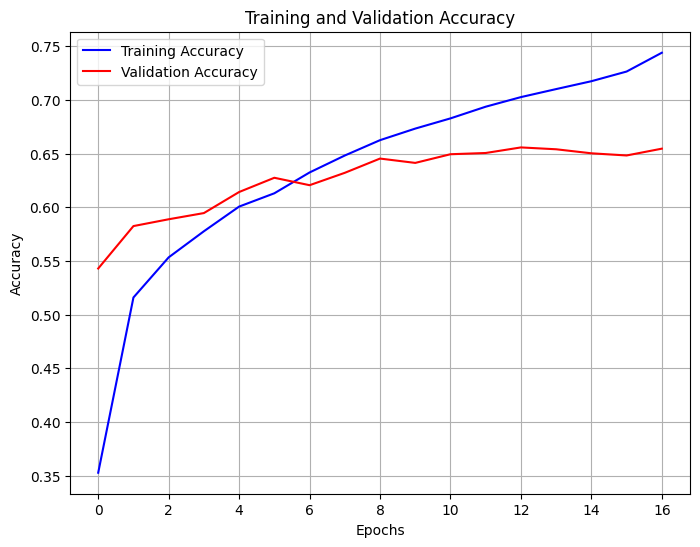

In [14]:
ModelUtilities.plot_training_history(history_dict)

In [12]:
model = ModelUtilities.load_model(f'cnn_model_using_mel_spectrogram_with_{n_mels}_n_mels.keras')
ModelUtilities.evaluate_model(model, X_test, y_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6264 - loss: 0.9557
Test Accuracy: 0.6341602802276611


(0.9909440875053406, 0.6341602802276611)

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


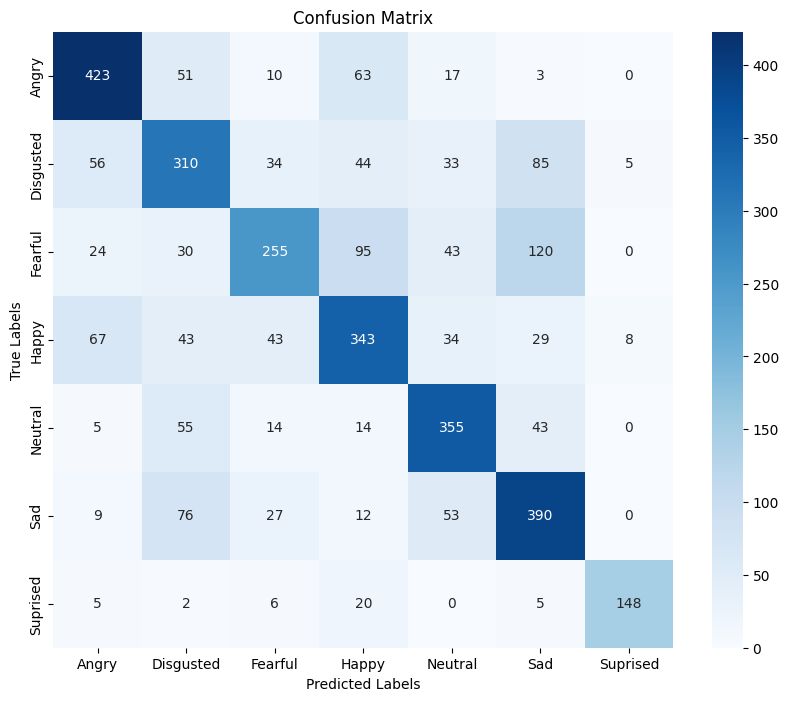

In [13]:
ModelUtilities.plot_confusion_matrix(model, X_test, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


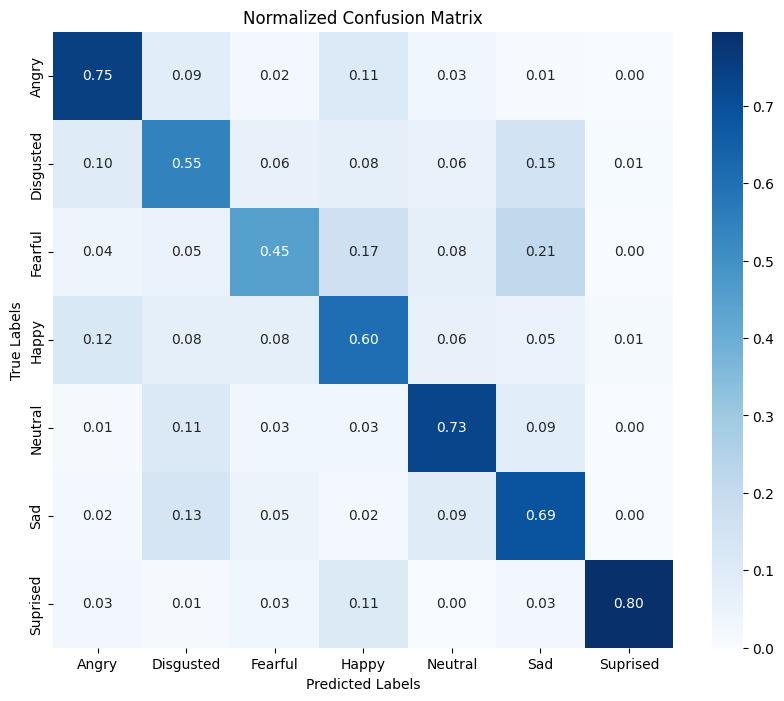

In [14]:
ModelUtilities.plot_confusion_matrix_normalized(model, X_test, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])